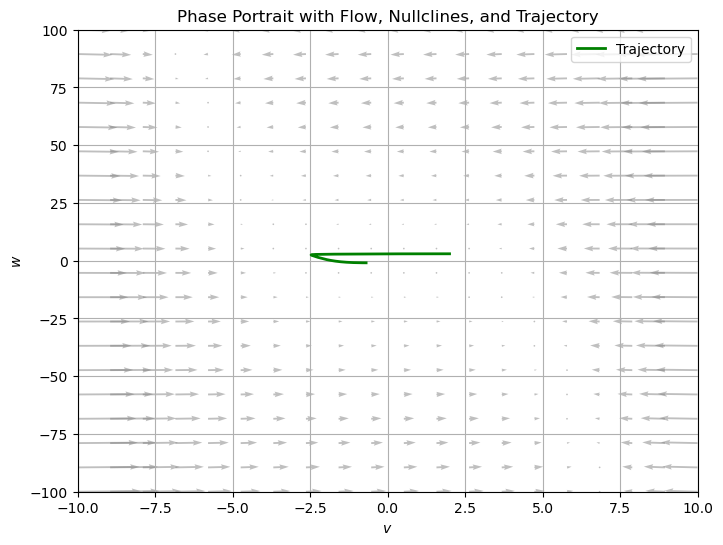

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

I = 0
tau = 10
a = 0
b = 1 / 2


# Define the system of differential equations
def system(t, z):
    v, w = z
    dvdt = f(v, w)
    dwdt = g(v, w)
    return [dvdt, dwdt]


# Define the functions f(x, y) and g(x, y)
def f(x, y):
    # Example function for dx/dt = f(x, y)
    return x - x**3 / 3 - y + I


def g(x, y):
    # Example function for dy/dt = g(x, y)
    return (x - a - b * y) / tau


# Function to plot nullclines
def plot_nullclines():
    x_vals = np.linspace(-10, 10, 400)
    y_vals_f = np.linspace(-10, 10, 400)
    y_vals_g = np.linspace(-10, 10, 400)

    # Nullcline where f(x, y) = 0 -> dx/dt = 0
    X_f, Y_f = np.meshgrid(x_vals, y_vals_f)
    Y_f = X_f  # For the example f(x, y) = x - y = 0 -> y = x

    # Nullcline where g(x, y) = 0 -> dy/dt = 0
    X_g, Y_g = np.meshgrid(x_vals, y_vals_g)
    Y_g = -X_g  # For the example g(x, y) = x + y = 0 -> y = -x

    plt.contour(
        X_f,
        Y_f,
        Y_f - X_f,
        [0],
        colors="r",
        label=r"$\frac{dx}{dt}=0$ (Nullcline for f(x, y))",
    )
    plt.contour(
        X_g,
        Y_g,
        Y_g + X_g,
        [0],
        colors="b",
        label=r"$\frac{dy}{dt}=0$ (Nullcline for g(x, y))",
    )


# Set the initial conditions and time span for solving the ODEs
v0, w0 = 2, 3  # Initial condition (x_0, y_0)
t_span = (0, 20)  # Time span for the solution

# Solve the system of ODEs using solve_ivp
initial_conditions = [v0, w0]
sol = solve_ivp(system, t_span, initial_conditions, t_eval=np.linspace(0, 20, 500))


v_side = 10
w_side = 100

# Set up the grid for plotting the vector field (flow)
v_grid, w_grid = np.meshgrid(
    np.linspace(-v_side, v_side, 20), np.linspace(-w_side, w_side, 20)
)
dv_grid = f(v_grid, w_grid)
dw_grid = g(v_grid, w_grid)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the flow (vector field)
plt.quiver(v_grid, w_grid, dv_grid, dw_grid, color="gray", alpha=0.5)

# Plot the nullclines
# plot_nullclines()

# Plot the trajectory (solution curve) for the initial conditions (x_0, y_0)
plt.plot(sol.y[0], sol.y[1], label="Trajectory", color="green", linewidth=2)

# Customize the plot
plt.xlim(-v_side, v_side)
plt.ylim(-w_side, w_side)
plt.xlabel("$v$")
plt.ylabel("$w$")
plt.title("Phase Portrait with Flow, Nullclines, and Trajectory")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()